### How are the resulting discrete class labels distributed?
### Are the classes unbalanced, and how much? How are the features distributed?
### Are there any pairs or subsets of features that seem highly correlated or redundant?


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df_annotations = pd.read_pickle(
    "dataset/task_2_annotations_82d1d6d1093eaab6_e330cbf_pandas.pkl"
)
df_annotations = df_annotations.dropna()  # remove NaNs (2 rows)
df_annotations

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3
3919,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1
3950,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2
3981,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1


## Mean Aggregation of the data

In [3]:
# aggregate data and remove first 3 id columns
df_ann_agg = (
    df_annotations.groupby("segment_id").mean().loc[:, "arousal":"gemmes_wandering"]
)
df_ann_agg

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
segment_id,,,,,,,,,,,,,,,,
0,2.495146,-0.155340,2.990291,2.553398,2.679612,3.495146,3.242718,1.747573,1.902913,1.941748,2.621359,3.689320,1.970874,1.796117,3.242718,2.990291
1,3.197802,0.131868,3.285714,3.098901,2.549451,3.065934,2.472527,2.296703,2.406593,2.450549,2.010989,3.439560,2.769231,2.472527,2.593407,2.648352
2,3.262136,0.126214,3.029126,2.689320,1.805825,2.029126,1.718447,2.699029,3.135922,3.019417,1.533981,2.572816,3.359223,2.699029,2.165049,2.427184
3,3.141304,-0.304348,2.326087,2.521739,1.510870,1.967391,1.434783,2.858696,2.206522,3.380435,2.293478,2.130435,2.771739,2.891304,2.391304,1.945652
4,3.174757,0.029126,3.398058,2.990291,2.902913,3.233010,2.679612,2.436893,1.854369,2.038835,2.456311,3.495146,1.951456,2.669903,3.097087,2.922330
5,2.456522,0.684783,3.152174,2.663043,2.673913,2.641304,2.934783,2.260870,3.119565,1.652174,1.478261,3.282609,2.826087,2.184783,2.500000,3.000000
6,2.417476,0.631068,3.116505,2.563107,3.893204,3.747573,3.932039,1.398058,2.048544,1.310680,2.281553,4.116505,1.815534,1.601942,3.252427,3.291262
7,3.065217,0.184783,3.293478,2.858696,2.836957,3.206522,2.369565,2.489130,2.402174,2.228261,2.152174,3.239130,2.619565,2.543478,2.771739,2.597826
8,3.291262,0.834951,3.106796,2.834951,2.184466,1.844660,1.932039,2.621359,3.378641,2.553398,1.320388,2.621359,3.485437,2.427184,2.058252,2.291262


## Add discrete labels

In [4]:
def label_race(row):
    if row["valence"] <= 0 and row["arousal"] > 3:
        return "angry"
    elif row["valence"] > 0 and row["arousal"] >= 3:
        return "happy"
    elif row["valence"] < 0 and row["arousal"] <= 3:
        return "sad"
    elif row["valence"] >= 0 and row["arousal"] < 3:
        return "relaxed"
    else:
        return "None"


df_ann_agg["class"] = df_ann_agg.apply(lambda row: label_race(row), axis=1)
df_ann_agg

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,class
segment_id,,,,,,,,,,,,,,,,,
0,2.495146,-0.155340,2.990291,2.553398,2.679612,3.495146,3.242718,1.747573,1.902913,1.941748,2.621359,3.689320,1.970874,1.796117,3.242718,2.990291,sad
1,3.197802,0.131868,3.285714,3.098901,2.549451,3.065934,2.472527,2.296703,2.406593,2.450549,2.010989,3.439560,2.769231,2.472527,2.593407,2.648352,happy
2,3.262136,0.126214,3.029126,2.689320,1.805825,2.029126,1.718447,2.699029,3.135922,3.019417,1.533981,2.572816,3.359223,2.699029,2.165049,2.427184,happy
3,3.141304,-0.304348,2.326087,2.521739,1.510870,1.967391,1.434783,2.858696,2.206522,3.380435,2.293478,2.130435,2.771739,2.891304,2.391304,1.945652,angry
4,3.174757,0.029126,3.398058,2.990291,2.902913,3.233010,2.679612,2.436893,1.854369,2.038835,2.456311,3.495146,1.951456,2.669903,3.097087,2.922330,happy
5,2.456522,0.684783,3.152174,2.663043,2.673913,2.641304,2.934783,2.260870,3.119565,1.652174,1.478261,3.282609,2.826087,2.184783,2.500000,3.000000,relaxed
6,2.417476,0.631068,3.116505,2.563107,3.893204,3.747573,3.932039,1.398058,2.048544,1.310680,2.281553,4.116505,1.815534,1.601942,3.252427,3.291262,relaxed
7,3.065217,0.184783,3.293478,2.858696,2.836957,3.206522,2.369565,2.489130,2.402174,2.228261,2.152174,3.239130,2.619565,2.543478,2.771739,2.597826,happy
8,3.291262,0.834951,3.106796,2.834951,2.184466,1.844660,1.932039,2.621359,3.378641,2.553398,1.320388,2.621359,3.485437,2.427184,2.058252,2.291262,happy


#### There are now no samples that cannot be classified

Without aggregation there are the samples with arousal = 3 and valence = 0 .

In [5]:
df_ann_agg["class"].unique()

array(['sad', 'happy', 'angry', 'relaxed'], dtype=object)

# Class distribution

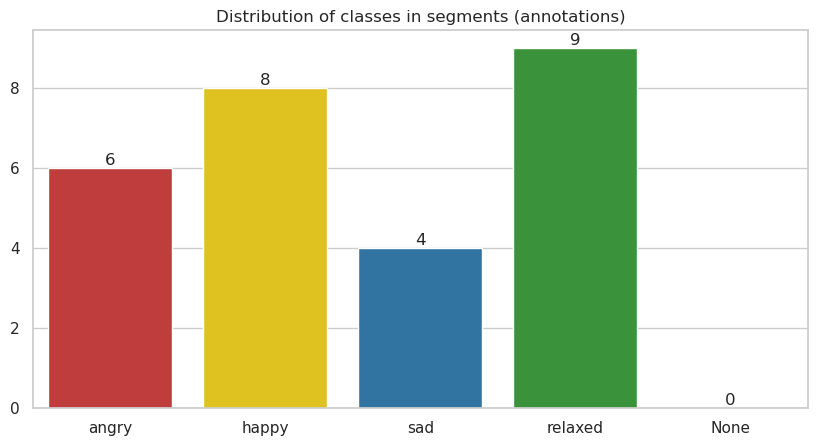

In [6]:
def plot_class_dist(df, title):
    sns.set_theme(style="whitegrid")

    # get the data the hard way
    x = ["angry", "happy", "sad", "relaxed", "None"]
    color = ["red", "yellow", "blue", "green", "grey"]

    # color palette as dictionary
    palette = {
        "angry": "tab:red",
        "happy": "gold",
        "sad": "tab:blue",
        "relaxed": "tab:green",
        "None": "tab:gray",
    }

    y = [(df["class"] == c).sum() for c in x]

    # use subplot to change size
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    # barplot
    ax1 = sns.barplot(x=x, y=y, palette=palette, ax=ax)
    # add numbers on top of bars
    ax1.bar_label(ax.containers[0])
    ax1.set_title(title)


plot_class_dist(df_ann_agg, "Distribution of classes in segments (annotations)")

# Class distribution witout aggregation

In [7]:
df_annotations["class"] = df_annotations.apply(lambda row: label_race(row), axis=1)
df_annotations

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,class
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2,sad
31,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3,sad
62,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4,relaxed
93,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5,relaxed
124,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,11,26,36,3,-1,3,2,1,4,1.0,3,2,3,5,4,2,2,5.0,3,sad
3919,11,26,55,2,0,2,2,2,3,3.0,3,1,3,1,2,3,2,1.0,1,relaxed
3950,11,26,136,2,1,2,1,1,2,2.0,2,2,1,1,2,2,1,2.0,2,relaxed
3981,11,26,169,2,0,2,1,2,2,1.0,3,4,3,2,2,3,3,1.0,1,relaxed


Here are some samples that do not belong to any class.

In [8]:
df_annotations["class"].unique()

array(['sad', 'relaxed', 'happy', 'None', 'angry'], dtype=object)

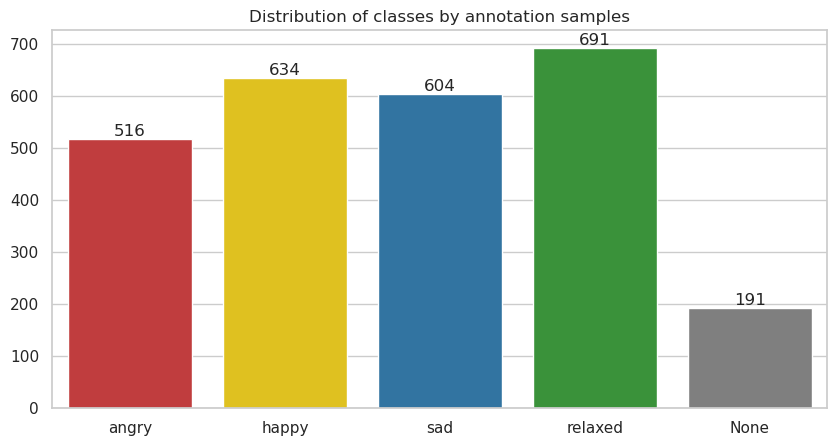

In [9]:
plot_class_dist(df_annotations, "Distribution of classes by annotation samples")

## Feature distribution

In [10]:
# load the feature data
df_features = pd.read_pickle(
    "dataset/task_2_features_1d8b658c21ddc127_e330cbf_pandas.pkl"
)
df_features

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.203668,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522
4176,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.161435,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763
4177,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.130765,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254
4178,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.247554,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997


Map the class from the aggregated annotations to the features

In [11]:
df_features["class"] = "None"

for row in df_features.iterrows():
    df_features["class"][row[0]] = df_ann_agg["class"][row[1]["segment_id"]]

df_features

/tmp/ipykernel_123086/68858252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features["class"][row[0]] = df_ann_agg["class"][row[1]["segment_id"]]


,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90,class
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025,sad
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610,sad
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690,sad
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971,sad
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522,happy
4176,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763,happy
4177,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254,happy
4178,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997,happy


In [12]:
df_features["class"].unique()

array(['sad', 'happy', 'angry', 'relaxed'], dtype=object)

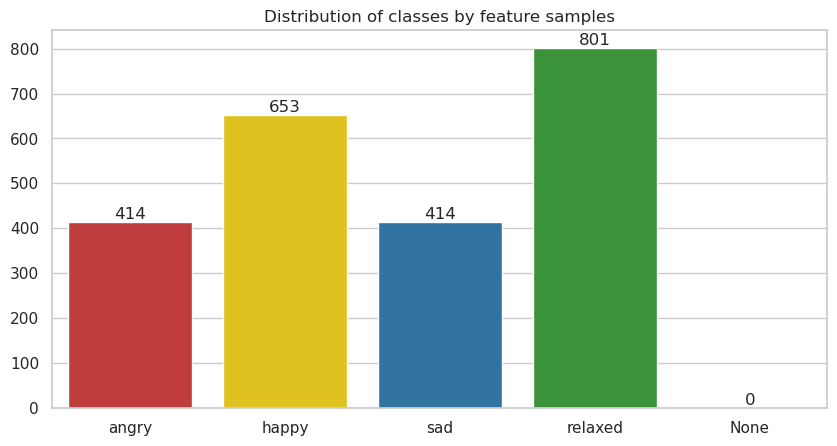

In [13]:
plot_class_dist(df_features, "Distribution of classes by feature samples")

# Mean Aggregate features by segments

In [14]:
df_feat_agg = df_features.groupby("segment_id").mean().loc[:, "essentia_dissonance_mean":"mirtoolbox_roughness_pct_90"]
df_feat_agg

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
segment_id,,,,,,,,,,,,,,,,,,,,,
0,0.159551,0.058506,2.895146,2.753894e+07,2.084646,0.599957,0.105709,955.499636,229.965426,29.187492,...,0.160377,0.000009,0.032318,0.243401,0.203801,0.008526,0.003569,0.004278,0.008082,0.013304
1,0.196607,0.057965,2.394305,6.117319e+07,2.301670,0.637262,0.098999,966.071043,194.634287,28.748457,...,0.173372,0.000122,0.049776,0.307120,0.175074,0.010722,0.004033,0.005902,0.010293,0.016138
2,0.214196,0.062558,2.235314,6.917189e+07,2.715138,0.653516,0.093361,982.364258,187.535136,29.415024,...,0.183278,0.000289,0.063626,0.343125,0.198330,0.013925,0.004710,0.008216,0.013484,0.020220
3,0.216549,0.069725,4.651397,4.788987e+07,2.124025,0.649502,0.109715,1255.061566,420.260744,30.306410,...,0.167438,0.000130,0.032315,0.258804,0.163899,0.013112,0.005146,0.006481,0.012921,0.019806
4,0.228933,0.056712,2.092673,8.328669e+07,0.774855,0.643411,0.084371,1249.855569,228.954020,28.857053,...,0.188998,0.000071,0.049371,0.364897,0.157221,0.012848,0.003740,0.008313,0.012477,0.017831
5,0.202621,0.063059,5.456600,3.221274e+07,2.416595,0.652701,0.098722,1073.327045,289.691019,29.501401,...,0.170484,0.000224,0.038863,0.280762,0.239324,0.010483,0.004560,0.004764,0.010144,0.016486
6,0.158368,0.059212,3.450224,2.755478e+07,2.323479,0.582134,0.116722,1016.775674,206.724254,28.800802,...,0.165146,0.000065,0.034170,0.255051,0.189992,0.008854,0.003701,0.004434,0.008426,0.013878
7,0.210618,0.060880,2.450005,9.625333e+07,3.256345,0.641182,0.096709,1032.726688,202.154389,29.165731,...,0.170308,0.000130,0.043464,0.286342,0.202911,0.012991,0.004157,0.007917,0.012628,0.018515
8,0.188291,0.067501,2.828518,3.262007e+07,4.042667,0.578685,0.115133,1088.762273,238.101856,28.897289,...,0.177045,0.000313,0.050180,0.293348,0.217564,0.010156,0.004511,0.004825,0.009562,0.016249


In [15]:
df_feat_agg["class"] = "None"

for row in df_feat_agg.iterrows():
    df_feat_agg["class"][row[0]] = df_ann_agg["class"][row[0]]

df_feat_agg

/tmp/ipykernel_123086/2395052562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat_agg["class"][row[0]] = df_ann_agg["class"][row[0]]


,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90,class
segment_id,,,,,,,,,,,,,,,,,,,,,
0,0.159551,0.058506,2.895146,2.753894e+07,2.084646,0.599957,0.105709,955.499636,229.965426,29.187492,...,0.000009,0.032318,0.243401,0.203801,0.008526,0.003569,0.004278,0.008082,0.013304,sad
1,0.196607,0.057965,2.394305,6.117319e+07,2.301670,0.637262,0.098999,966.071043,194.634287,28.748457,...,0.000122,0.049776,0.307120,0.175074,0.010722,0.004033,0.005902,0.010293,0.016138,happy
2,0.214196,0.062558,2.235314,6.917189e+07,2.715138,0.653516,0.093361,982.364258,187.535136,29.415024,...,0.000289,0.063626,0.343125,0.198330,0.013925,0.004710,0.008216,0.013484,0.020220,happy
3,0.216549,0.069725,4.651397,4.788987e+07,2.124025,0.649502,0.109715,1255.061566,420.260744,30.306410,...,0.000130,0.032315,0.258804,0.163899,0.013112,0.005146,0.006481,0.012921,0.019806,angry
4,0.228933,0.056712,2.092673,8.328669e+07,0.774855,0.643411,0.084371,1249.855569,228.954020,28.857053,...,0.000071,0.049371,0.364897,0.157221,0.012848,0.003740,0.008313,0.012477,0.017831,happy
5,0.202621,0.063059,5.456600,3.221274e+07,2.416595,0.652701,0.098722,1073.327045,289.691019,29.501401,...,0.000224,0.038863,0.280762,0.239324,0.010483,0.004560,0.004764,0.010144,0.016486,relaxed
6,0.158368,0.059212,3.450224,2.755478e+07,2.323479,0.582134,0.116722,1016.775674,206.724254,28.800802,...,0.000065,0.034170,0.255051,0.189992,0.008854,0.003701,0.004434,0.008426,0.013878,relaxed
7,0.210618,0.060880,2.450005,9.625333e+07,3.256345,0.641182,0.096709,1032.726688,202.154389,29.165731,...,0.000130,0.043464,0.286342,0.202911,0.012991,0.004157,0.007917,0.012628,0.018515,happy
8,0.188291,0.067501,2.828518,3.262007e+07,4.042667,0.578685,0.115133,1088.762273,238.101856,28.897289,...,0.000313,0.050180,0.293348,0.217564,0.010156,0.004511,0.004825,0.009562,0.016249,happy


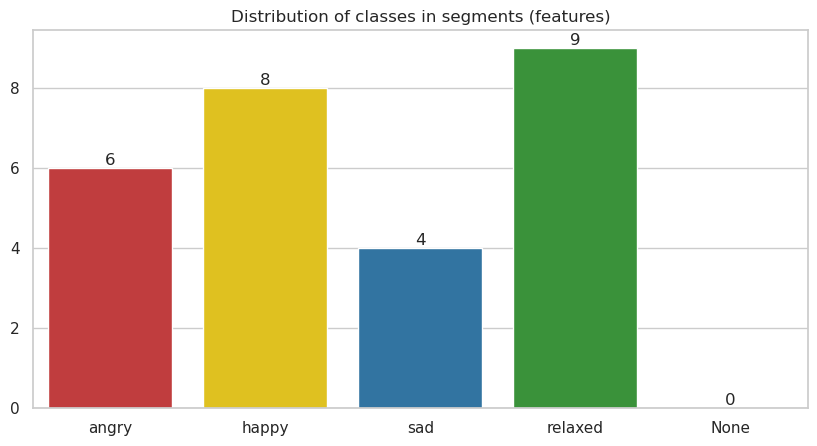

In [16]:
plot_class_dist(df_feat_agg, "Distribution of classes in segments (features)")

#TODO: feature correlation